In [1]:
from qmpy import *
from django.db.models import Count
import seaborn as sns
import freud

In [2]:
# fe = Element.objects.get(symbol='Fe')
# atom_set.count()
a=Entry.objects.values()
a.count()
a_red=a[0:100]
# print(a_red)

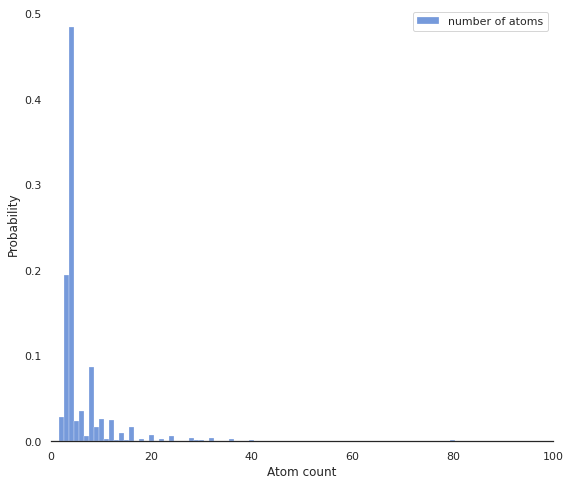

In [ ]:
natoms=[]
red_db = list(Entry.objects.values('natoms'))[::10]
for i in range(len(red_db)):
    natoms.append(red_db[i]['natoms'])
    
E=[]
formE = list(Entry.objects.values('formationenergy'))[::10000]
for i in range(len(formE)):
    E.append(formE[i]['formationenergy'])

    

sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)
sns.histplot(data=natoms, stat="probability", color='b', discrete=True, label='number of atoms')
ax.set_xlabel('Atom count')
plt.legend()
plt.xlim(0,100)
# plt.savefig('oqmd_natom_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)
sns.histplot(data=E, stat="probability", color='r', discrete=True, label='number of atoms')
ax.set_xlabel('Atom count')
plt.legend()
plt.xlim(0,100)
# plt.savefig('oqmd_natom_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

# stat{“count”, “frequency”, “density”, “probability”}

In [6]:
print(list(Entry.objects.values))

FE = list(Entry.objects.values('formationenergy'))[::10]
FE1 = list(Entry.objects.annotate(n_structures=Count('formationenergy')))[::10]
print(type(FE), len(FE), FE[0])
print(type(FE1), len(FE1), FE1[0])

n_atoms = list(Entry.objects.values('natoms'))[::10]
n_atoms1 = list(Entry.objects.annotate(n_structures=Count('natoms')))[::10]
print(type(n_atoms), len(n_atoms), n_atoms[0])
print(type(n_atoms1), len(n_atoms1), n_atoms1[0])



<bound method BaseManager._get_queryset_methods.<locals>.create_method.<locals>.manager_method of <django.db.models.manager.Manager object at 0x7f68813937b8>>
<class 'list'> 166699 {'formationenergy': 4830529}
<class 'list'> 81438 1603 - LaF3
<class 'list'> 81438 {'natoms': 24}
<class 'list'> 81438 1603 - LaF3


In [ ]:
FE = list(Entry.objects.values('formationenergy'))[::1000]
# FE1 = list(Entry.objects.annotate(n_structures=Count('formationenergy')))[::1000]

formE=[]
formE1=[]
for i in range(len(FE)):
    formE.append(FE[i]['formationenergy'])
    
# for i in range(len(FE1)):
#     formE1.append(FE1[i])

sns.set(style="white", palette="muted", color_codes=True)
# f, ax = plt.subplots(figsize=(9, 8))
# sns.despine(left=True)

# sns.histplot(data=formE1, stat="probability", color='orange', discrete=True, label='Formation Energy (eV)')


# ax.set_xlabel('Formation Energy (eV)')
# plt.legend()
# plt.xlim(0,100)
# plt.savefig('oqmd_formE_occ.png', bbox_inches='tight', dpi=400)
# plt.show()
# plt.close()

f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)

sns.histplot(data=formE, stat="probability", color='r', discrete=True, label='Formation Energy (eV)')

ax.set_xlabel('Formation Energy (eV)')
plt.legend()
plt.xlim(0,100)
plt.savefig('oqmd_formE_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()